In [516]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [517]:
df = pd.read_csv(r"C:\Users\dell\Documents\Data analysis\OASIS INFOBYTE\house price prediction\Housing.csv")

In [518]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [519]:
df.shape

(545, 13)

In [520]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [522]:
df['main_road_coded']= df['mainroad'].map({'yes':1, 'no':0})

In [523]:
df['guestroom_coded']= df['guestroom'].map({'yes':1, 'no':0})

In [524]:
df['basement_coded']= df['basement'].map({'yes':1, 'no':0})

In [525]:
df['hotwaterheating_coded']= df['hotwaterheating'].map({'yes':1, 'no':0})

In [526]:
df['airconditioning_coded']= df['airconditioning'].map({'yes':1, 'no':0})

In [527]:
df['prefarea_coded']= df['prefarea'].map({'yes':1, 'no':0})

In [528]:
#we will use one code encoding here as we only have 3 unique categories for furnishing

df_encoded = pd.get_dummies(df, columns = ['furnishingstatus'], drop_first = False)
df_encoded['furnishingstatus_furnished']=df_encoded['furnishingstatus_furnished'].astype(int)
df_encoded['furnishingstatus_semi-furnished']= df_encoded['furnishingstatus_semi-furnished'].astype(int)
df_encoded['furnishingstatus_unfurnished']= df_encoded['furnishingstatus_unfurnished'].astype(int)


In [529]:
new_df = df_encoded.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'], axis =1)

In [530]:
new_df

,price,area,bedrooms,bathrooms,stories,parking,main_road_coded,guestroom_coded,basement_coded,hotwaterheating_coded,airconditioning_coded,prefarea_coded,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


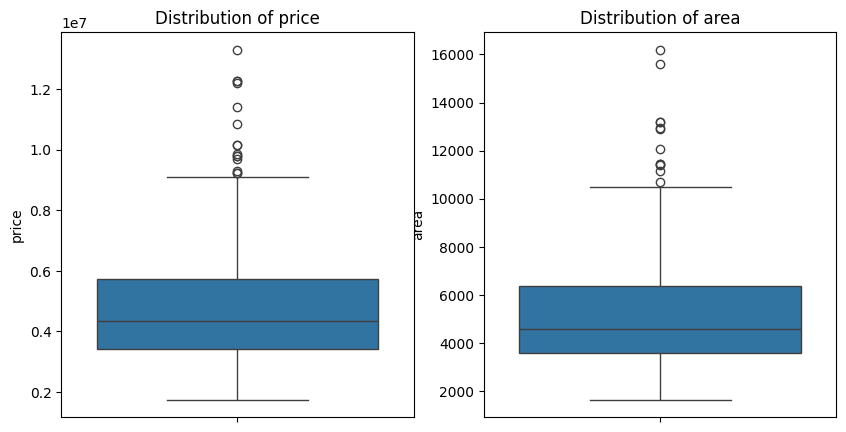

In [531]:
#boxplot for prics , area
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(data= new_df['price'])
plt.title('Distribution of price')

plt.subplot(1,2,2)
sns.boxplot(data= new_df['area'])
plt.title('Distribution of area')
plt.show()

In [532]:
q1= new_df['area'].quantile(0.25)
q3= new_df['area'].quantile(0.75)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3-1.5*iqr
print('lower bound :', lb)
print('upper bound:', ub)

lower bound : -540.0
upper bound: 2220.0


In [533]:
q1= new_df['price'].quantile(0.25)
q3= new_df['price'].quantile(0.75)
iqr = q3-q1
lbp = q1-1.5*iqr
ubp = q3-1.5*iqr
print('lower bound :', lbp)
print('upper bound:', ubp)

lower bound : -35000.0
upper bound: 2275000.0


In [534]:
after_removing_outliers = new_df[new_df['area']<ub]

In [535]:
after_removing_outliers.shape

(18, 15)

In [536]:
outlier_df = new_df[new_df['area']>ub]
outlier_df.shape

(527, 15)

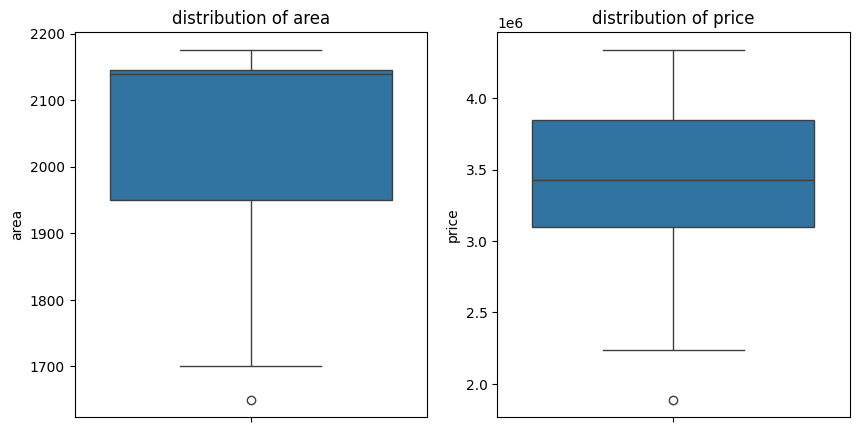

In [537]:
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
sns.boxplot(after_removing_outliers['area'])
plt.title('distribution of area')

plt.subplot(1,2,2)
sns.boxplot(after_removing_outliers['price'])
plt.title('distribution of price')
plt.show()

In [538]:
outlier_df['price_per_sqfeet'] = outlier_df['price']/ outlier_df['area']

C:\Users\dell\AppData\Local\Temp\ipykernel_9220\1144583157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['price_per_sqfeet'] = outlier_df['price']/ outlier_df['area']


In [539]:
from sklearn.preprocessing import StandardScaler

In [540]:
scaler = StandardScaler()

In [541]:
scaled_df = scaler.fit_transform(outlier_df[['area','bedrooms','bathrooms','stories','parking','price_per_sqfeet']])

In [542]:
scaled_df= pd.DataFrame(scaled_df)
scaled_df = scaled_df.reset_index(drop=True)

In [543]:
categorical_col = outlier_df[['main_road_coded','guestroom_coded','basement_coded','hotwaterheating_coded','airconditioning_coded','prefarea_coded','furnishingstatus_furnished','furnishingstatus_semi-furnished','furnishingstatus_unfurnished']]

In [544]:
categorical_col= categorical_col.reset_index(drop = True)

In [545]:
Final_feature = pd.concat([scaled_df,categorical_col],axis=1 )

In [546]:
Final_feature = Final_feature.rename(columns = {'main_road_coded':5,'guestroom_coded':6,'basement_coded':7,'hotwaterheating_coded':8,'airconditioning_coded':9,'prefarea_coded':10,'furnishingstatus_furnished':11,'furnishingstatus_semi-furnished':12,'furnishingstatus_unfurnished':13})

In [547]:
x = Final_feature 
y = outlier_df['price']

In [548]:
from sklearn.model_selection import train_test_split

In [549]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [550]:
x_train_df, x_test , y_train_df, y_test= train_test_split(x,y , test_size = 0.2 , random_state = 42)

In [551]:
x_train_df.shape

(421, 15)

In [552]:
y_train_df.shape

(421,)

In [553]:
model = LinearRegression()
model.fit(x_train_df, y_train_df)
y_pred= model.predict(x_test)

In [554]:
mse = mean_squared_error(y_pred, y_test)
r2= r2_score (y_pred, y_test)

In [555]:
print ('mean squared error', mse)
print ('R2 score', r2)


mean squared error 490317726547.16785
R2 score 0.8758275306964586


In [556]:
Final_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       527 non-null    float64
 1   1       527 non-null    float64
 2   2       527 non-null    float64
 3   3       527 non-null    float64
 4   4       527 non-null    float64
 5   5       527 non-null    float64
 6   5       527 non-null    int64  
 7   6       527 non-null    int64  
 8   7       527 non-null    int64  
 9   8       527 non-null    int64  
 10  9       527 non-null    int64  
 11  10      527 non-null    int64  
 12  11      527 non-null    int64  
 13  12      527 non-null    int64  
 14  13      527 non-null    int64  
dtypes: float64(6), int64(9)
memory usage: 61.9 KB


In [557]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   main_road_coded                  545 non-null    int64
 7   guestroom_coded                  545 non-null    int64
 8   basement_coded                   545 non-null    int64
 9   hotwaterheating_coded            545 non-null    int64
 10  airconditioning_coded            545 non-null    int64
 11  prefarea_coded                   545 non-null    int64
 12  furnishingstatus_furnished       545 non-null    i

In [558]:
outlier_df['logprice'] = np.log1p(outlier_df['price'])

C:\Users\dell\AppData\Local\Temp\ipykernel_9220\1342222347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['logprice'] = np.log1p(outlier_df['price'])


In [559]:
x2 = Final_feature 
y2 = outlier_df['logprice']

In [560]:
x_train_df2, x_test2 , y_train_df2, y_test2= train_test_split(x2,y2 , test_size = 0.2 , random_state = 42)

In [561]:
model = LinearRegression()
model.fit(x_train_df2, y_train_df2)
y_pred2= model.predict(x_test2)

In [562]:
mseL= mean_squared_error(y_pred2, y_test2)
r2L= r2_score (y_pred2, y_test2)

In [563]:
print ('mean squared error', mseL)
print ('R2 score', r2L)


mean squared error 0.014134986916349524
R2 score 0.9109283007135403
